In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test 2

## Question 1

In [ ]:
import pandas as pd
import os

df = pd.read_csv('/content/drive/MyDrive/datasets/test/data_studentlist.csv', header='infer')
df.head(5)


,Name,Gender,Age,Grade,Absence,Bloodtype,Height,Weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [ ]:
df[df['Gender'] == 'M'].Height.mean()

172.41000000000003

In [ ]:
df[df['Gender'] == 'F'].Height.mean()

166.64285714285714

In [ ]:
df[df['Gender'] == 'M'].Weight.mean()

68.50000000000001

In [ ]:
df[df['Gender'] == 'F'].Weight.mean()

50.44285714285714

In [ ]:
df[df['Gender'] == 'M'].Height.max()

182.1

In [ ]:
df[df['Gender'] == 'F'].Height.min()

155.2

In [ ]:
df[(df['Gender'] == 'M') & (df['Height'] > 175)].Weight.min()

61.3

In [ ]:
df[(df['Gender'] == 'F') & (df['Height'] < 160)].Weight.max()

45.3

In [ ]:
df[df['Absence']!= 'N'].Grade.mean()

3.0

In [ ]:
df[df['Absence']== 'Y'].Grade.mean()

3.0

In [ ]:
df[(df['Bloodtype'] == 'A') | (df['Bloodtype'] == 'AB')].Height.mean()

172.64285714285714

In [ ]:
df[((df['Bloodtype'] == 'A') | (df['Bloodtype'] == 'AB')) & (df['Gender'] == 'M')].Height.mean()

173.375

In [ ]:
df[(df['Absence'] == 'Y') & (df.Grade >= 3)].Age.mean()

23.666666666666668

## Question 2

In [ ]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('/content/drive/MyDrive/datasets/test/data_census.csv', header='infer')
df.shape
df.head(10) 


,Province Code,City Code,Population,Households,Person's Household,Gender Ratio
0,109,1001,"10,078,850","4,197,478",2.40,0.97
1,109,1188,"155,695","72,882",2.14,0.98
2,109,1189,"126,817","59,614",2.13,1.00
3,109,1158,"235,186","108,138",2.17,0.94
4,109,1105,"298,145","126,915",2.35,0.99
5,109,1032,"362,197","158,769",2.28,0.97
6,109,1065,"362,604","160,110",2.26,1.01
7,109,1190,"417,976","177,077",2.36,1.00
8,109,1106,"464,176","192,670",2.41,0.96
9,109,1006,"333,523","141,325",2.36,0.97


In [ ]:
df.dtypes

Province Code           int64
City Code               int64
Population             object
Households             object
Person's Household    float64
Gender Ratio          float64
dtype: object

In [ ]:
df.Population = df.Population.astype(str).str.replace(',','').astype('int64')
df.dtypes

Province Code           int64
City Code               int64
Population              int64
Households             object
Person's Household    float64
Gender Ratio          float64
dtype: object

In [ ]:
df[(df['Province Code'] == 115) | (df['Province Code'] == 116)].Population.sum()

5970327

In [ ]:
df[df['Gender Ratio']>1].Population.mean()

419221.2076923077

In [ ]:
df[(df['Gender Ratio']>1) & (df["Person's Household"] < 2)]

,Province Code,City Code,Population,Households,Person's Household,Gender Ratio
62,112,1155,20825,"11,172",1.86,1.29
149,101,1240,26790,"13,433",1.99,1.27
152,101,1017,30066,"15,485",1.94,1.15
167,117,1033,38027,"19,145",1.99,1.03
227,113,1120,43566,"22,248",1.96,1.11
253,104,1163,10304,"5,365",1.92,1.15


In [ ]:
df.Households = df.Households.astype(str).str.replace(',','').astype('int64')
df.sort_values(ascending = True, by = ['Households']).head(10)

,Province Code,City Code,Population,Households,Person's Household,Gender Ratio
253,104,1163,10304,5365,1.92,1.15
244,104,1147,17984,8769,2.05,0.97
200,114,1179,23308,10877,2.14,0.98
150,101,1130,24283,11162,2.18,1.17
62,112,1155,20825,11172,1.86,1.29
199,114,1073,25181,11723,2.15,0.98
241,104,1039,24096,12091,1.99,1.00
213,113,1034,27115,12465,2.18,0.95
198,114,1193,26325,12531,2.10,1.00
243,104,1208,26353,13233,1.99,0.98


## Question 3

In [ ]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv('/content/drive/MyDrive/datasets/test/data_sales.csv', header='infer')
df.shape
df.head(5)


,Date,Region,Item,Unit Price,Units
0,04-Jul-14,East,Pen Set,4.99,62
1,12-Jul-14,East,Binder,1.99,29
2,21-Jul-14,Central,Pen Set,12.49,55
3,29-Jul-14,East,Binder,19.99,81
4,07-Aug-14,Central,Pen Set,23.95,42


In [ ]:
df['Amount'] = df['Unit Price'] * df['Units']
df.head()

,Date,Region,Item,Unit Price,Units,Amount
0,04-Jul-14,East,Pen Set,4.99,62,309.38
1,12-Jul-14,East,Binder,1.99,29,57.71
2,21-Jul-14,Central,Pen Set,12.49,55,686.95
3,29-Jul-14,East,Binder,19.99,81,1619.19
4,07-Aug-14,Central,Pen Set,23.95,42,1005.90


In [ ]:
df.groupby('Region')[['Unit Price']].mean()

,Unit Price
Region,
Central,18.018750
East,9.143846
West,53.658333


In [ ]:
pd.pivot_table(df, index = ['Region'], values = ['Unit Price'], aggfunc = np.mean)

,Unit Price
Region,
Central,18.018750
East,9.143846
West,53.658333


In [ ]:
df.groupby('Region')[['Unit Price', 'Units']].mean()

,Unit Price,Units
Region,,
Central,18.018750,49.958333
East,9.143846,53.153846
West,53.658333,38.500000


In [ ]:
pd.pivot_table(df, index = ['Region'], values = ['Unit Price', 'Units'], aggfunc = np.mean)

,Unit Price,Units
Region,,
Central,18.018750,49.958333
East,9.143846,53.153846
West,53.658333,38.500000


In [ ]:
pd.pivot_table(df, index = ['Region', 'Item'], values = ['Amount'], aggfunc = np.sum, fill_value = 0)

Amount
Region  Item            
Central Binder   5762.63
        Desk      875.00
        Pen       539.73
        Pen Set  2421.39
        Pencil   1540.32
East    Binder   2535.66
        Pen      1354.25
        Pen Set  1748.48
        Pencil    363.70
West    Binder   1279.36
        Desk      825.00
        Pen       151.24
        Pencil    231.12

## Question 4

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/datasets/test/data_coffeeshop.csv', header='infer',na_values=[' '])
df.shape
df.head(5)


,Year of Start,Current State,Size of Site
0,2008.0,In,20.80
1,2010.0,In,212.72
2,2013.0,In,20.04
3,2012.0,In,64.17
4,2002.0,Out,11.40


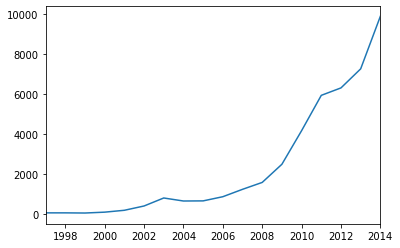

In [ ]:
df_f = df['Year of Start'].value_counts()
df_f = df_f.sort_values(ascending = True)
df_f.sort_index(inplace = True)
fig, axs = plt.subplots()
axs.set_xlim(1997, 2014)
axs.plot(df_f)

<class 'matplotlib.figure.Figure'>


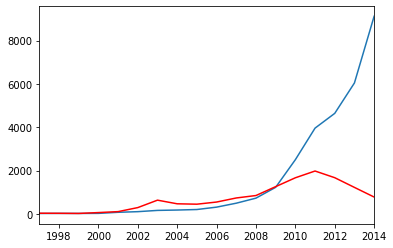

In [ ]:
df_in = df[df['Current State'] == 'In']['Year of Start'].value_counts()
df_out = df[df['Current State'] == 'Out']['Year of Start'].value_counts()
df_in.sort_values(ascending = True, inplace = True)
df_out.sort_values(ascending = True, inplace = True)

df_in.sort_index(ascending = True, inplace = True)
df_out.sort_index(ascending = True, inplace = True)

fig, axs = plt.subplots()
fig.suptitle("")
plt.xlim(1997, 2014)
axs.plot(df_in)
axs.plot(df_out, c='red')

#####these plots show us how many coffee shops emerged from 1997, until 2014.
#####until 2009, we can see from the second plot that the frequency of coffee shops opening that are in and out of business is almost the same, meaning that almost as many shops that opened that are in business are out of business.
#####however starting 2009, we can tell from the first plot that the number of coffee shops opening has drastically risen.
#####and from the second plot we can see that most of these coffee shops are still in business, while the rest is out of business.
#####we can conclude that as time goes on, there are way more coffee shops that open, and most of them remain in business.

## Question 5

In [ ]:
#the correct syntax is 2
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])

## Question 6

In [ ]:
#the closest answer to the 2-D array is the array 2
#an important note: the array as typed in the question must be a list and not a tuple so 
#[[1, 2, 3], [4, 5, 6]] instead of ([1, 2, 3], [4, 5, 6])
np.array([[1, 2, 3], [4, 5, 6]]).ndim

2

## Question 7

In [ ]:
# as it is written, none, since the numpy module doesn't have attributes
# and the methods are not methods to use directly with numpy module
# one must first have an array and then use dim to get the dimensions
# because dim is an attribute of the ndarray object (numpy array)
# the closest but not exact answer will be number 4
np.array([[1, 2, 3], [4, 5, 6]]).ndim

2

## Question 8

In [ ]:
# the correct syntax is 1, as array's index starts with 0:
myArr = np.array([1,2,3,4,5,6])
print(myArr[0])

1


## Question 9

In [ ]:
arr = np.array([[1,2,3,4,5], [6,7,8,9,10]])
#the correct answer is number 3:
print(arr[1,2])

8


## Question 10

In [ ]:
arr = np.array([1,2,3,4,5,6,7])
#the correct answer is number 2
print(arr[2:5])

[3 4 5]


## Question 11

In [ ]:
#the correct answer is 2
np.concatenate([arr, myArr])

array([1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6])

## Question 12

In [ ]:
arr = np.array([1,4,3,4,5,4,4])
#the correct answer is 3:
np.where(arr == 4)

(array([1, 3, 5, 6]),)

## Question 13

In [ ]:
#the correct answer is 3:
np.random.randint(100)

61

## Question 14

In [ ]:
#the correct answer is 1, as np.random.normal has the parameters size, loc and scale, nor mean, deviation, normal or s
np.random.normal(size=1000, loc=50, scale=0.2)

array([50.2298822 , 50.31521032, 49.73650183, 49.99630482, 50.15785865,
       50.21785254, 49.9984457 , 50.01194234, 50.27366576, 50.28437367,
       49.97501153, 50.00236621, 50.12674213, 49.91676869, 50.28379603,
       50.18124959, 49.92870066, 49.81423273, 50.29297421, 50.3649615 ,
       49.81555983, 49.8985468 , 50.08236658, 50.30084987, 50.31675472,
       50.04294648, 49.93220067, 49.92179135, 49.92878243, 50.01482182,
       49.86496624, 50.00036568, 50.11641518, 49.87074534, 50.06256532,
       50.25396819, 49.97620386, 49.92694715, 50.1442866 , 50.18195965,
       49.67652024, 49.88254439, 50.01491925, 50.21433686, 50.1696102 ,
       49.94486059, 50.18703717, 50.02485519, 50.06238424, 49.8470648 ,
       49.97152898, 50.0321769 , 50.22465647, 50.1065567 , 49.63743467,
       50.26657136, 49.64790357, 49.73809399, 49.82081314, 50.00979787,
       49.90071285, 50.25106574, 49.98212971, 49.93895181, 49.91479216,
       49.78050937, 49.98171128, 50.08045787, 50.00697098, 49.81

## Question 15

In [ ]:
arr1 = np.array([1,2,3,4,5])
arr2 = np.flip(arr1) #its arr1 but in reverse order

#the correct syntax is 1:
np.add(arr1,arr2)

array([6, 6, 6, 6, 6])

## Question 16

In [ ]:
#the closest answer to the correct syntax is 4:
#there is no np.substract but there is np.subtract (there is no s after sub)
np.subtract(arr1,arr2)

array([-4, -2,  0,  2,  4])

## Question 17

In [ ]:
some_array = np.random.uniform(1,10, size = 5) #an array of random floats
#the correct answer is 3, all of them are rounding methods in numpy:
print(np.fix(some_array))
print(np.trunc(some_array))
#however we can notice that the way the decimals were rounded is slightly different with round
print(np.round(some_array))

[8. 9. 5. 8. 9.]
[8. 9. 5. 8. 9.]
[ 8. 10.  6.  9.  9.]


## Question 18

In [ ]:
#the correct answer is 4
# the values returned will be as follows:
# first value = 1+0 = 1
# second value = 2+1 = 3
# third value = 1+2+3 = 6
arr = np.array([1,2,3])
print(np.cumsum(arr))

[1 3 6]


## Question 19

In [ ]:
#the correct answer is 1
import pandas as pd
mylist = [1,2,3,4,5,6,7,8,9,10]
pd.Series(mylist)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64